In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

In [31]:
df = pd.read_csv("/content/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [33]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [34]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [35]:
df.shape

(400, 11)

# Now check for outliers

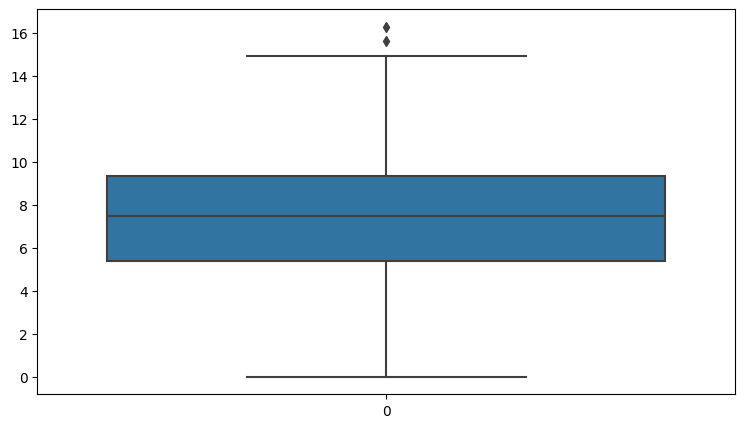

In [36]:
ax = sns.boxplot(df['Sales'])

# The data has 2 outlier instances

In [37]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


<ipython-input-38-24ad884932c3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df['Sales'],shade=True,color='g')


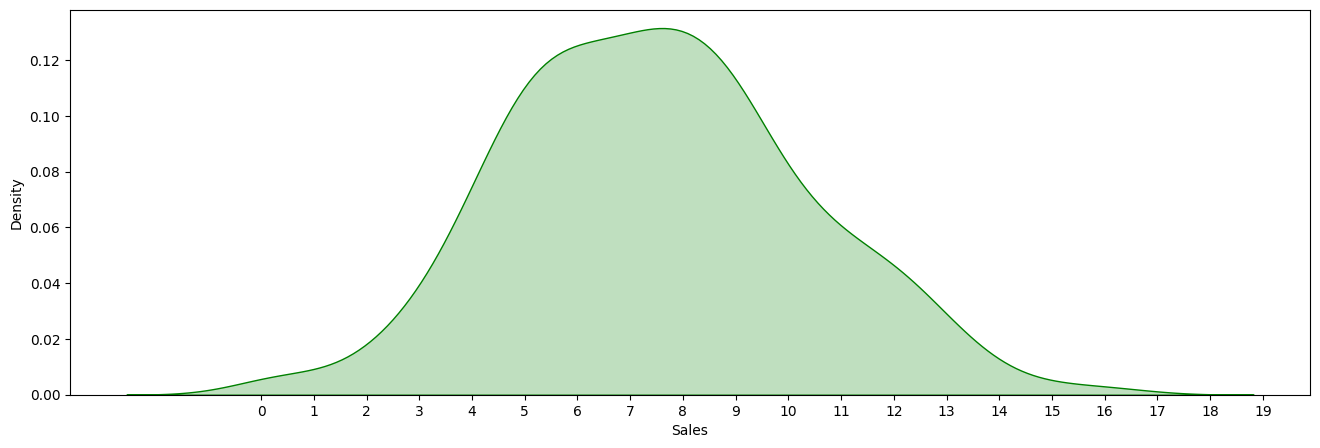

In [38]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

# The data is Skwed on the right
# The data has negative Kurtosis


In [39]:
obj_colum = df.select_dtypes(include='object').columns.tolist()

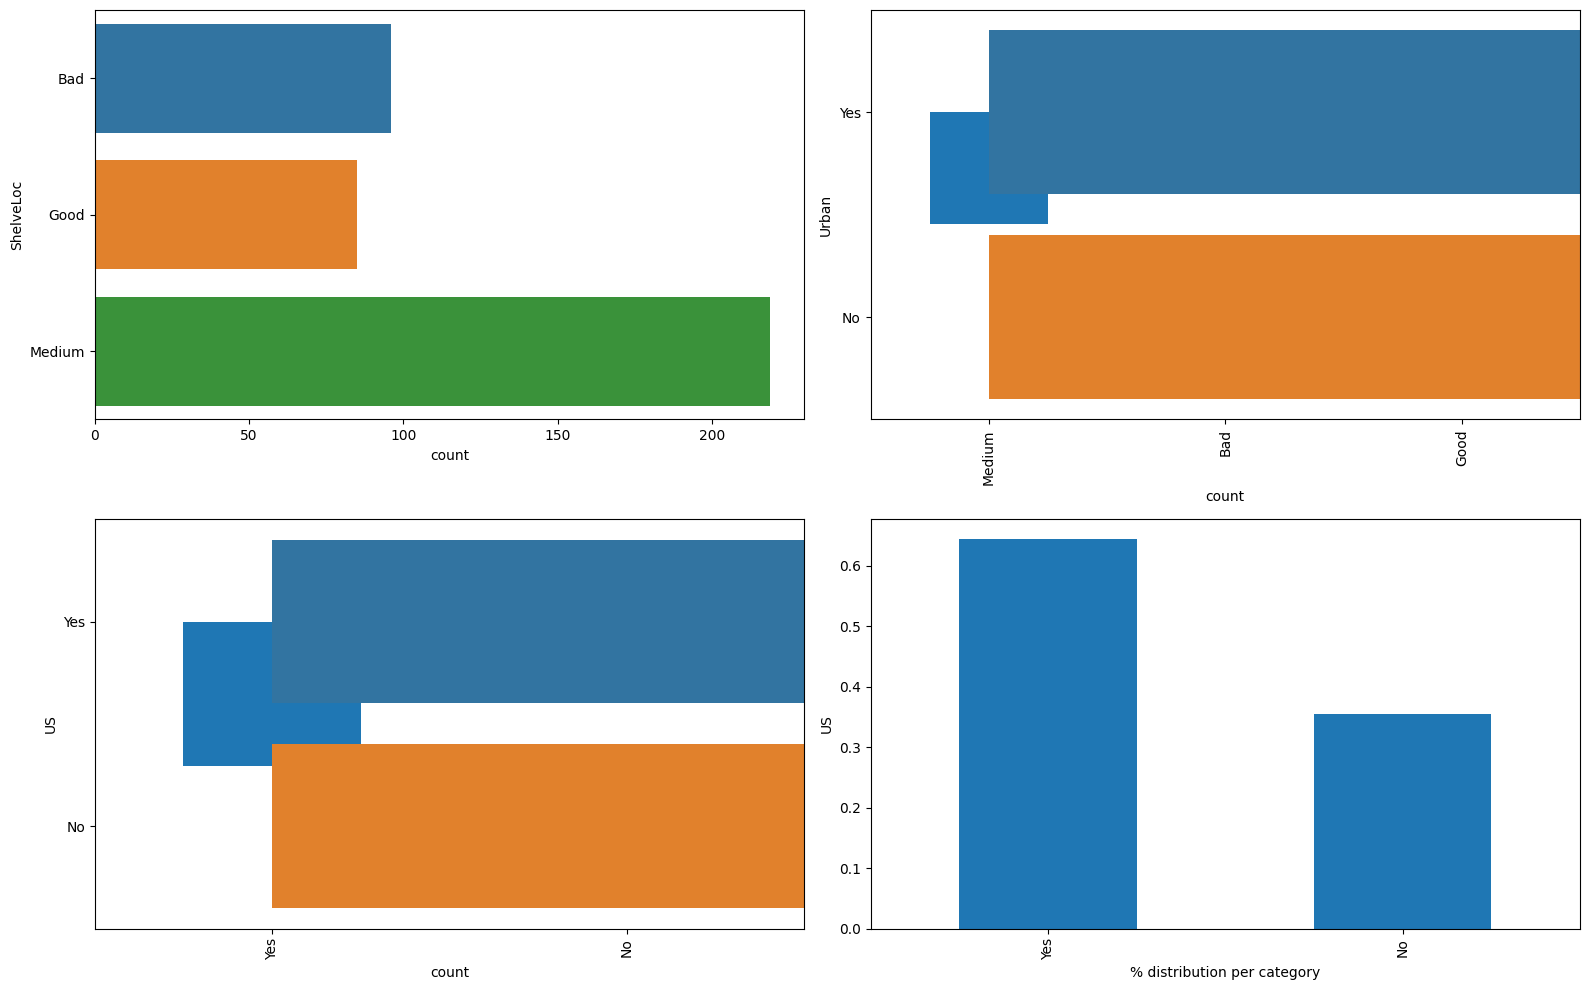

In [40]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [41]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()

<ipython-input-42-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-42-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-42-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-42-580362cfca90>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='g',shade=True)
<ipython-input-42-580362cfca90>:4: FutureWarning: 

`shade` 

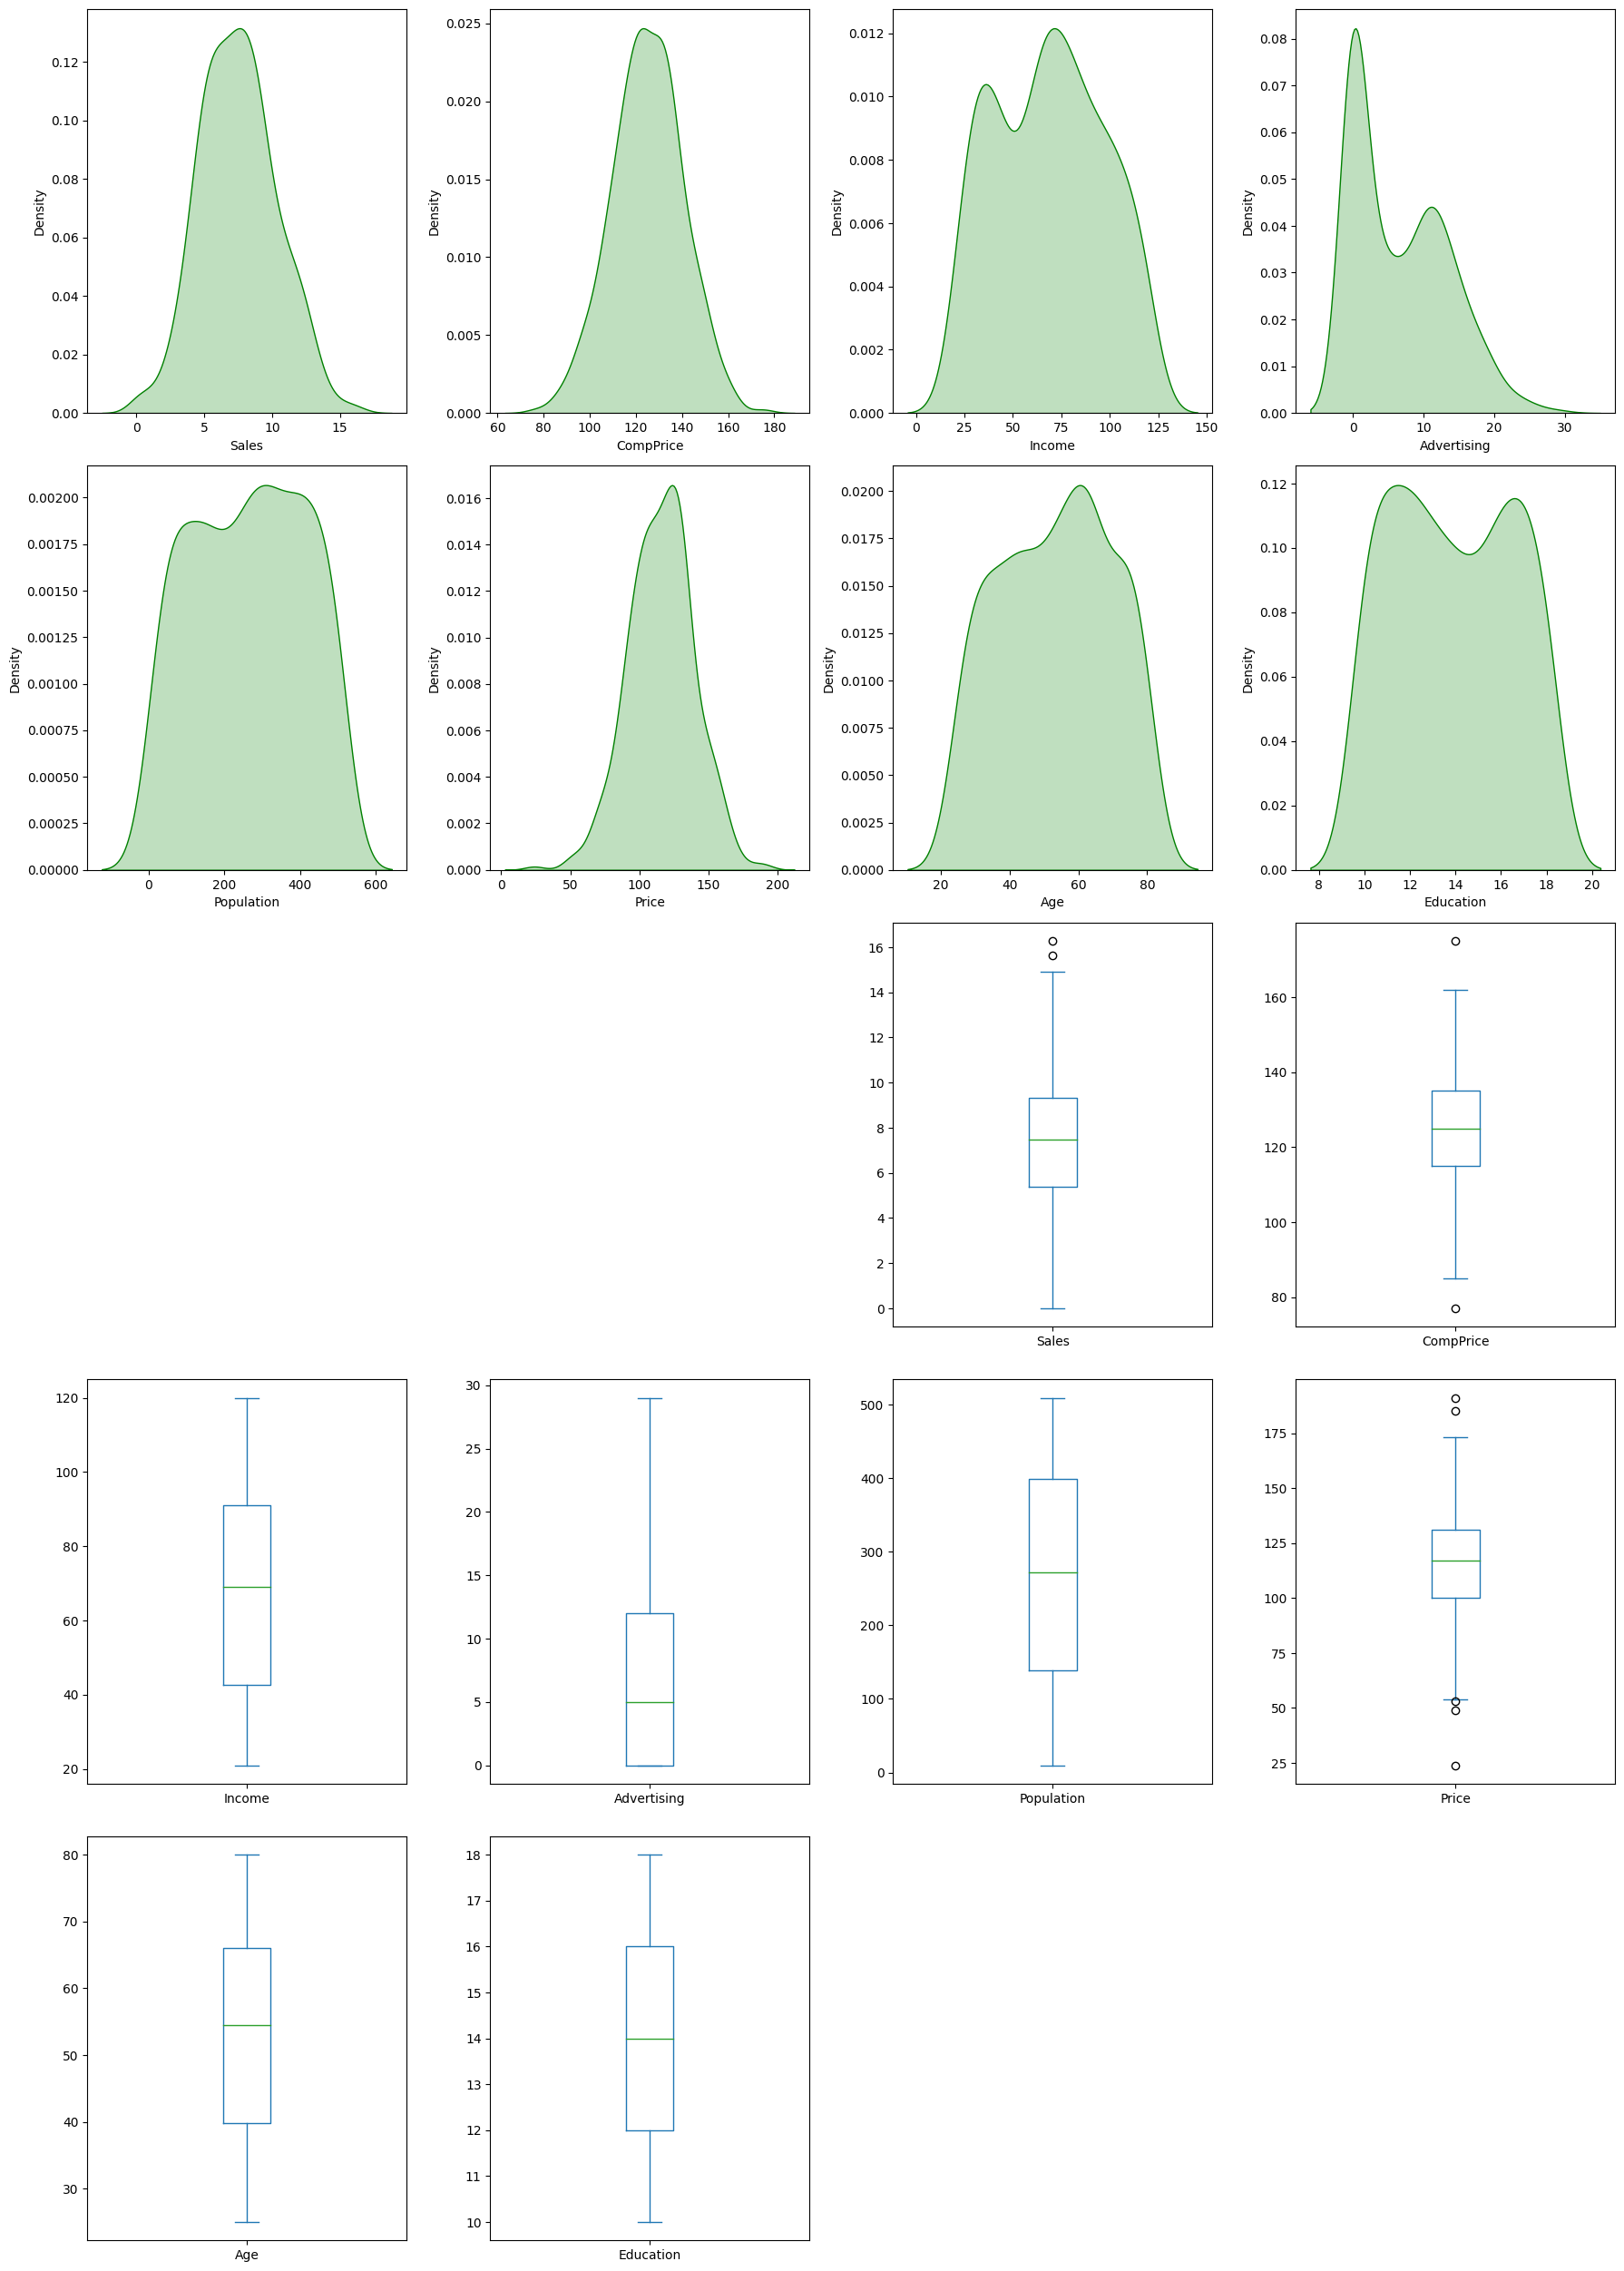

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [42]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout()
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

# correlation

In [43]:
corr = df.corr()

<ipython-input-43-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [44]:
df = pd.get_dummies(df, columns = ['ShelveLoc','Urban','US'])

In [45]:
corr = df.corr()

<Axes: >

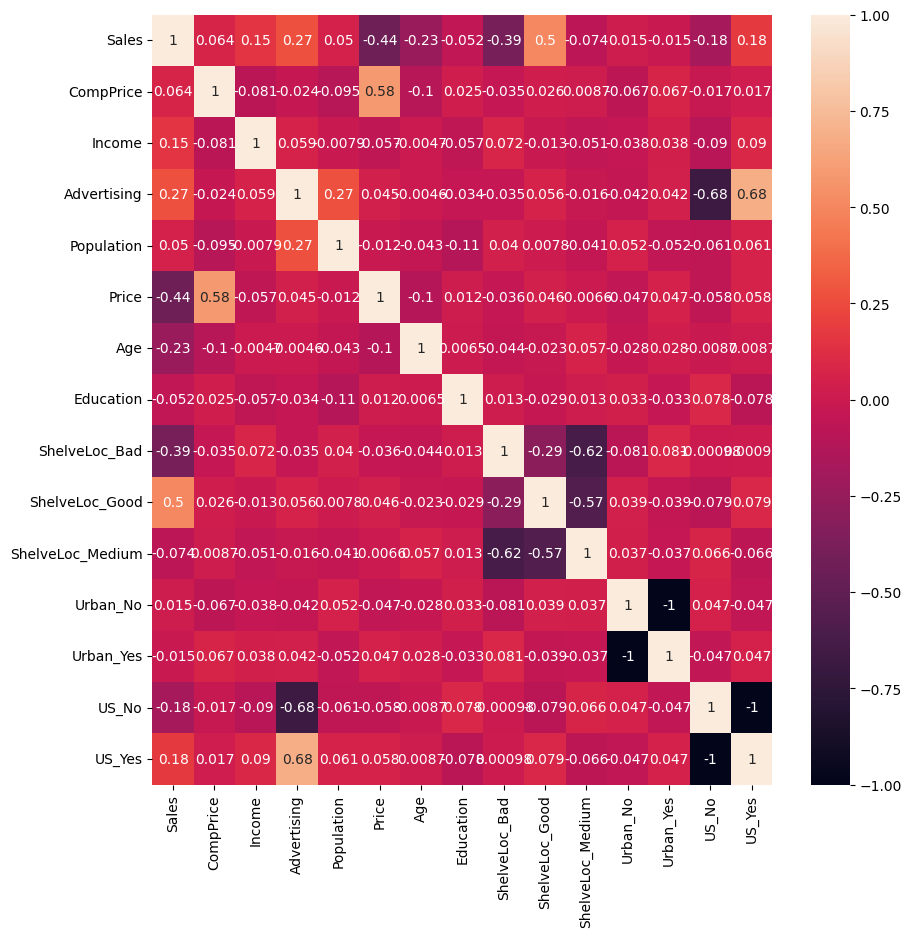

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Decision Tree - Model
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [48]:
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [49]:
X = df.iloc[:,0:14]
y = df.iloc[:,14]

In [50]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [51]:
y_train.value_counts()

small    161
large    159
Name: sales, dtype: int64

In [52]:
model = DT(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
pred_train = model.predict(x_train)

In [54]:
accuracy_score(y_train,pred_train)

1.0

In [55]:

confusion_matrix(y_train,pred_train)

array([[159,   0],
       [  0, 161]])

In [56]:
pred_test = model.predict(x_test)

In [57]:
accuracy_score(y_test,pred_test)

0.775

In [58]:
confusion_matrix(y_test,pred_test)

array([[34,  6],
       [12, 28]])

In [60]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})
df_t

,Actual,Predicted
376,large,large
190,large,large
364,large,large
27,small,small
151,large,large
...,...,...
45,small,small
242,small,small
286,large,large
5,large,large


In [62]:
cols = list(df.columns)

In [63]:

predictors = cols[0:14]
target = cols[14]

In [64]:
dot_data = StringIO()

In [66]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )


In [67]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [68]:
graph.write_png('company_full.png')

True

# Conclusion
##Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 70%
##As seen in the confusion matrix of Test data 56 instances are presdected correctly and 24 instances are not

In [70]:
img = mpimg.imread("/content/company_full.png")

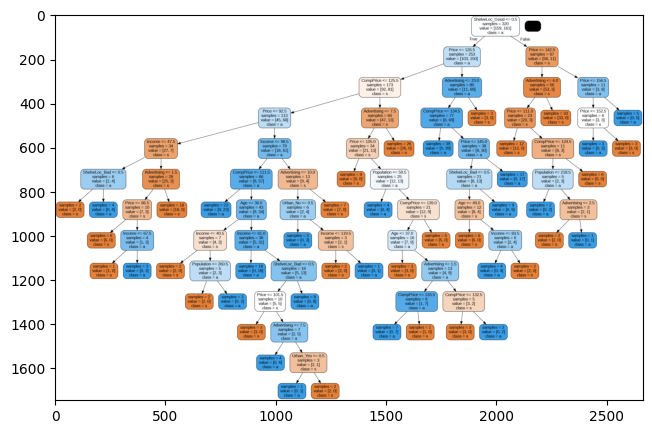

In [71]:
plt.imshow(img)

In [72]:
model.feature_importances_

array([0.15972696, 0.11398594, 0.14132484, 0.03511338, 0.3329847 ,
       0.04298473, 0.        , 0.06239697, 0.09426395, 0.        ,
       0.00860927, 0.00860927, 0.        , 0.        ])

In [73]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [74]:
fi

,feature,importance
4,Price,0.332985
0,CompPrice,0.159727
2,Advertising,0.141325
1,Income,0.113986
8,ShelveLoc_Good,0.094264
7,ShelveLoc_Bad,0.062397
5,Age,0.042985
3,Population,0.035113
10,Urban_No,0.008609
11,Urban_Yes,0.008609


# As seen in the above table Price is most important feature